## TSNE Embedding Analysis with Temporal Consistency

In [2]:
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from sklearn.manifold import TSNE
from sklearn.manifold._t_sne import TSNE

meson-python: building scikit-learn: /Users/caizhebiao/miniconda3/envs/sklearn-env/bin/ninja
[1/138] Compiling Cython source '/Users/caizhebiao/Course/semester1/Deep Learning/R2_tSNE & UMAP/tSNE/scikit-learn/sklearn/metrics/_pairwise_fast.pyx'
[2/138] Compiling Cython source '/Users/caizhebiao/Course/semester1/Deep Learning/R2_tSNE & UMAP/tSNE/scikit-learn/sklearn/metrics/cluster/_expected_mutual_info_fast.pyx'
[3/138] Compiling Cython source sklearn/metrics/_pairwise_distances_reduction/_base.pyx
[4/138] Compiling Cython source sklearn/metrics/_pairwise_distances_reduction/_argkmin_classmode.pyx
[5/138] Compiling Cython source sklearn/metrics/_pairwise_distances_reduction/_argkmin.pyx
[6/138] Compiling Cython source sklearn/metrics/_pairwise_distances_reduction/_datasets_pair.pyx
[7/138] Compiling Cython source sklearn/metrics/_pairwise_distances_reduction/_middle_term_computer.pyx
[8/138] Compiling Cython source sklearn/metrics/_pairwise_distances_reduction/_radius_neighbors_classmod

In [3]:
# Load the data from the pickle file
file_path = '/Users/caizhebiao/Course/semester1/Deep Learning/R2_tSNE & UMAP/Data/large_cap_x_data.pickle'

with open(file_path, 'rb') as file:
    data = pickle.load(file)

# Describe the data
print(f"Type of data: {type(data)}")

print(f"Number of keys (timestamps): {len(data)}")

# Show the first few keys (timestamps)
print("\nFirst 5 timestamps:")
print(list(data.keys())[:5])

# Inspect the structure of the values corresponding to the first timestamp
first_timestamp = list(data.keys())[0]
print(f"\nData type for the first timestamp ({first_timestamp}): {type(data[first_timestamp])}")

# Print the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(data[first_timestamp].head())

print(data[first_timestamp].columns)

# Print the dimensions of the dataset
print(f"Dataset dimensions: {data[first_timestamp].shape}")

Type of data: <class 'dict'>
Number of keys (timestamps): 263

First 5 timestamps:
[Timestamp('2000-12-31 00:00:00'), Timestamp('2001-01-31 00:00:00'), Timestamp('2001-02-28 00:00:00'), Timestamp('2001-03-31 00:00:00'), Timestamp('2001-04-30 00:00:00')]

Data type for the first timestamp (2000-12-31 00:00:00): <class 'pandas.core.frame.DataFrame'>

First few rows of the DataFrame:
       return__1y return__2y return__3y information_ratio_geo_1y  \
as_of                                                              
B14289   0.060557   0.089329   0.105613                  1.48421   
B24194   0.158892   0.137095   0.092367                  1.82151   
B00356    0.19123   0.396596    0.38117                  1.32031   
B15503  -0.115709   0.052764   0.159084                  -0.2371   
B08426   0.017042   0.222839   0.266609                  0.28514   

       information_ratio_geo_2y information_ratio_geo_3y batting_average_1y  \
as_of                                                       

In [4]:
# Step 1: Identify common stocks across all timestamps
# Get the index (stock codes) for each DataFrame
common_stocks = set(data[list(data.keys())[0]].index)  # Start with stocks from the first timestamp

# Find the intersection of stock codes across all timestamps
for timestamp in data.keys():
    common_stocks = common_stocks.intersection(data[timestamp].index)

# Convert the common stocks back to a list for later use
common_stocks = list(common_stocks)

print(f"Common stocks across all timestamps: {common_stocks}")
print(f"Number of common stocks: {len(common_stocks)}")

Common stocks across all timestamps: ['B11472', 'B21601', 'B08378', 'B05551', 'B06639', 'B08363', 'B08335', 'B08376', 'B16812', 'B07785', 'B04687', 'B21549', 'B22272', 'B11985', 'B17783', 'B00356', 'B12284', 'B08341', 'B24186', 'B10567', 'B04731', 'B14112', 'B02738', 'B08500', 'B11655', 'B22233', 'B21801', 'B23977', 'B16591', 'B03142', 'B08358', 'B21699', 'B24174', 'B08470', 'B03193', 'B08368', 'B14940', 'B11819', 'B08415', 'B23896', 'B07780', 'B22229', 'B03745', 'B00350', 'B07747', 'B02857', 'B07143', 'B02943', 'B08417', 'B19389', 'B18804', 'B03634', 'B21954', 'B03669', 'B02476', 'B03358', 'B16800', 'B22187', 'B01766', 'B16922', 'B21791', 'B22455']
Number of common stocks: 62


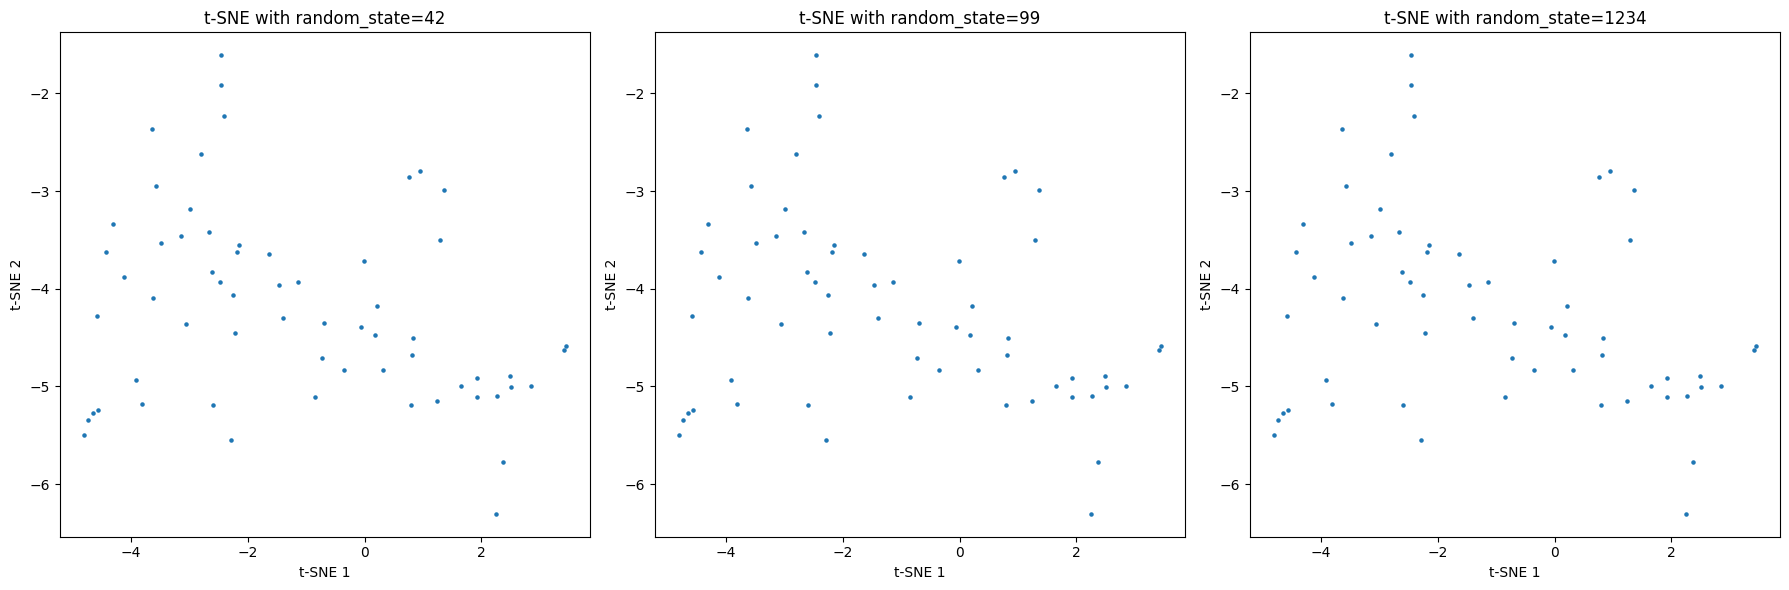

In [5]:
# Function to run t-SNE and plot the results
def run_tsne_and_plot(X, random_state, ax):
    tsne = TSNE(random_state=random_state)
    embedding = tsne.fit_transform(X)

    # Plot the embedding
    ax.scatter(embedding[:, 0], embedding[:, 1], s=5)
    ax.set_title(f't-SNE with random_state={random_state}')
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')

# Convert all columns to numeric, forcing errors to NaN
df = data[first_timestamp].loc[common_stocks]
df_numeric = df.apply(pd.to_numeric, errors='coerce')
df_numeric = df_numeric.dropna()

# Proceed with t-SNE if there are valid numeric columns
if df_numeric.shape[1] > 0:
    X = df_numeric.values

    # Set up the figure for multiple t-SNE plots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Run t-SNE with different random seeds and plot
    random_states = [42, 99, 1234]
    for i, random_state in enumerate(random_states):
        run_tsne_and_plot(X, random_state, axs[i])

    plt.tight_layout()
    plt.show()

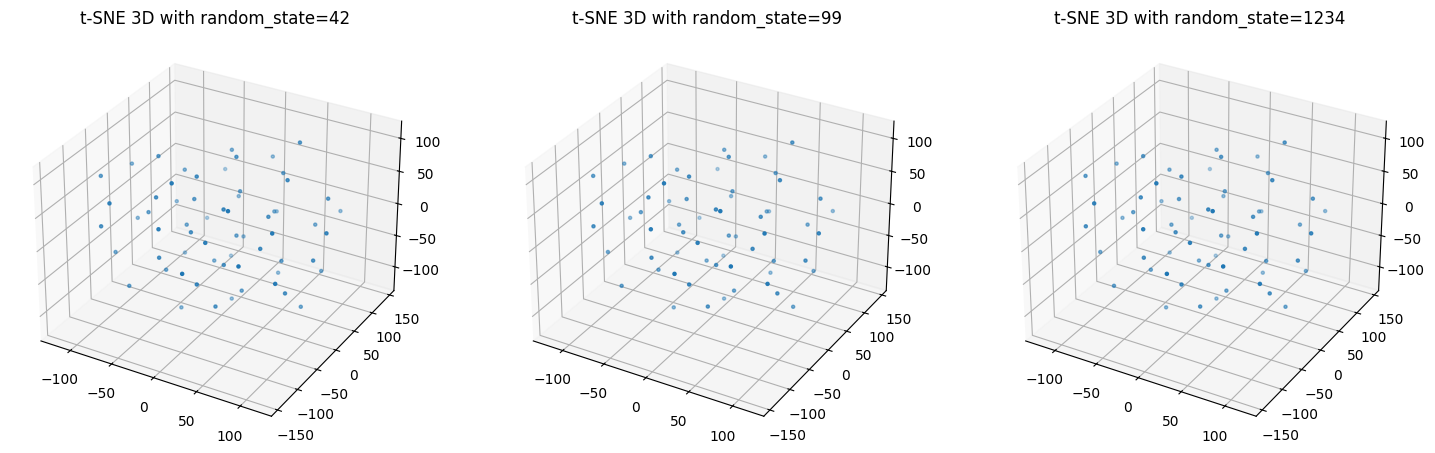

In [6]:
# Function to run t-SNE and plot the results in 3D
def run_tsne_and_plot_3d(X, random_state, ax):
    tsne = TSNE(random_state=random_state, n_components=3)
    embedding = tsne.fit_transform(X)

    # Plot the embedding in 3D
    ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], s=5)
    ax.set_title(f't-SNE 3D with random_state={random_state}')

# Set up the figure for multiple 3D t-SNE plots
fig = plt.figure(figsize=(18, 6))

# Run t-SNE with different random seeds and plot
random_states = [42, 99, 1234]
for i, random_state in enumerate(random_states):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    run_tsne_and_plot_3d(X, random_state, ax)

plt.show()

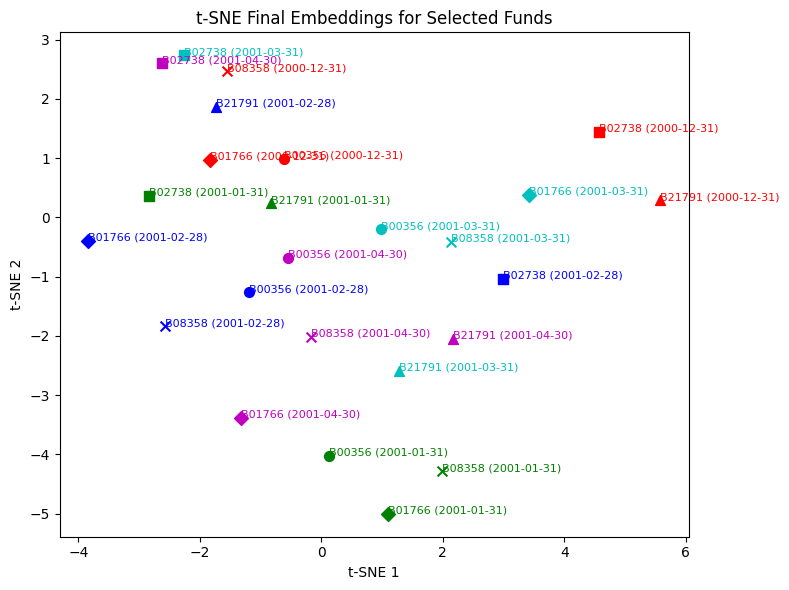

In [7]:
# Step 1: Iterate over all timestamps, apply t-SNE, and save the embeddings
for timestamp in data.keys():
    df = data[timestamp]

    # Step 2: Filter the DataFrame to include only common stocks
    df_filtered = df.loc[common_stocks]

    # Step 3: Convert all columns to numeric, forcing errors to NaN
    df_numeric = df_filtered.apply(pd.to_numeric, errors='coerce')

    # Step 4: Initialize the t-SNE model with a timestamp for saving results
    timestamp_str = str(timestamp.date())  # Convert timestamp to string for filenames
    tsne_model = TSNE(random_state=42)

    # Step 5: Fit t-SNE on the numeric data (This will save the final and intermediate embeddings)
    embedding = tsne_model.fit_transform(df_numeric)

    # Save the final embedding to a file
    np.save(f'final_embedding_{timestamp_str}.npy', embedding)

# Step 6: Plot the first five final embeddings
timestamps_to_plot = list(data.keys())[:5]

# Set up colors for differentiation
colors = ['r', 'g', 'b', 'c', 'm']

# List of markers for different stocks
markers = ['o', 'x', 's', '^', 'D']  # Circle, cross, square, triangle, diamond

# Create a new figure
fig, ax = plt.subplots(figsize=(8, 6))

# List of selected funds to track (use their indices or labels)
selected_funds = ['B00356', 'B08358', 'B02738', 'B21791', 'B01766']  # Add your desired fund codes here

# Plot each final embedding with a different color and marker for each stock
for i, timestamp in enumerate(timestamps_to_plot):
    timestamp_str = str(timestamp.date())
    
    # Load the final embedding from the saved file
    embedding = np.load(f'./output/final_embedding_{timestamp_str}.npy')
    
    # Highlight and label the selected funds with different colors for each timestamp
    for j, fund in enumerate(selected_funds):
        if fund in common_stocks:
            fund_index = common_stocks.index(fund)  # Find the index of the fund
            ax.scatter(embedding[fund_index, 0], embedding[fund_index, 1], s=50, c=colors[i], marker=markers[j])
            ax.text(embedding[fund_index, 0], embedding[fund_index, 1], f'{fund} ({timestamp_str})', fontsize=8, color=colors[i])
        else:
            print(f"Warning: {fund} not found in common stocks for timestamp {timestamp_str}")

# Add title and legend
ax.set_title('t-SNE Final Embeddings for Selected Funds')
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')

# Show the plot
plt.tight_layout()
plt.show()

### Conclusion

The results from our experiments indicate that using t-SNE for dimensionality reduction can exhibit instability over time. This means that the embeddings for the same set of data, when visualized over different time periods, do not maintain a consistent structure or spatial arrangement. In the plots provided, you can see how the clusters for each timestamp shift positions or change their density, suggesting that t-SNE may not preserve temporal consistency effectively.

This instability could be due to t-SNE's nature of focusing on local rather than global structures, as well as the randomness involved in the initialization and optimization process. When applied to time-series data, this characteristic of t-SNE can lead to varying representations even for similar datasets across consecutive time intervals. Consequently, for applications that require consistent embeddings over time, such as tracking the evolution of financial markets or monitoring changes in customer behavior, it is necessary to adjust the t-SNE structure. This involves introducing modifications or stabilization techniques to ensure that the generated embeddings maintain a consistent arrangement across different time periods, thereby improving the temporal stability of the visualizations.